In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

### (b) Produce a visual estimate of the best classifier in the class of all linear decision functions.

Text(0.5, 1.0, 'Visualize $\\eta$')

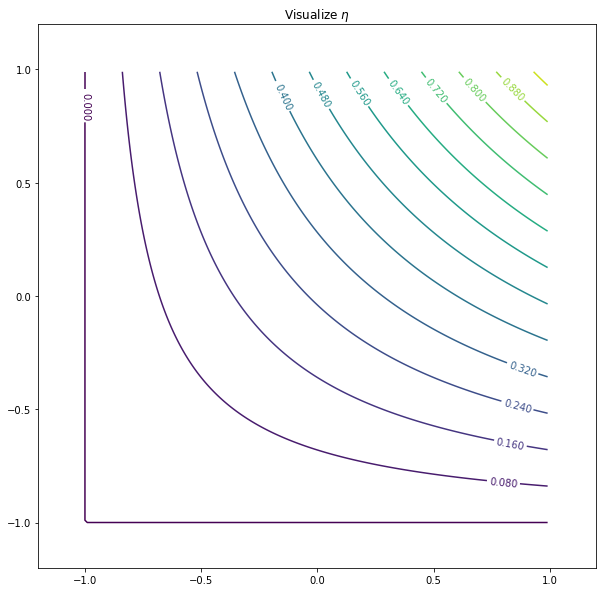

In [2]:
# Part B

x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 1/4 * (X + 1) * (Y + 1)
plt.figure(figsize=(10,10))
CS = plt.contour(X, Y, Z, 15)
plt.clabel(CS, inline=1, fontsize=10)
plt.ylim([-1.2,1.2])
plt.xlim([-1.2,1.2])
plt.title(r'Visualize $\eta$')


### (c) Generate training data $D_l$ from the joint distribution of (X, Y ) and sample the risk of the classifier.

In [3]:
n = 1000000
X = np.random.uniform(low=-1.0, high=1.0, size=(n,2))
eta = 1/4*(X+1).prod(axis = 1)

rng = np.random.default_rng()
y = (rng.uniform(0, 1, n) <= eta).astype(int)  # This is essentially bernoulli(eta) in each row

In [4]:
pred = (eta>1/2).astype('int')
L_risk = np.sum(pred != y)/n
print(L_risk)

0.201702


###(d) Generate training data $D_l$ from the joint distribution of (X, Y) again. Write an algorithm that finds the empirically optimal decision function $\hat{\phi}_l$ by brute force minimization of $\hat{L}_l(\phi)$ over all  $\binom{l}{2}$  different classifiers from the class $C_l$ of all classifiers that are defined by lines through pairs of data points

### (e) Estimate the generalization error of the computed classifier (i.e., the true risk $L(\hat{\phi}_l)$ by sampling. Compare with (a).

In [41]:
n = 1000
rng = np.random.default_rng()
X = rng.uniform(-1, 1, (n, 2))
eta = 1/4 * (X + 1).prod(axis=1)
real = (rng.uniform(0, 1, n) <= eta).astype(int)

best_risk = np.inf
best_coeffs = np.array([0, 0])
counter = 0
for i in range(n):
  for j in range(i+1, n):
    counter +=1
    decision_coeffs = np.polyfit(X[i], X[j], 1) # Line through two points
    prediction = X.dot(decision_coeffs)
    prediction = (prediction > 1/2)
    risk = np.sum(prediction != real)/ n
    
    if risk < best_risk: 
      best_risk = risk
      best_coeffs = decision_coeffs
trendpoly = np.poly1d(best_coeffs) 
print('The Best classifier is :{x1_c:.3f}*x_1 + {x2_c:.3f}*x_2 = 1/2'.format(x1_c = trendpoly[0], x2_c = trendpoly[1]))

# Part E

numerical_eta = X.dot(best_coeffs) 
prediction = (numerical_eta >= 1/2) # now check if numerical eta is less 1/2
empirical_risk = np.sum(prediction != real)/ n

print('The generalisation error of the estimated optimal classifier is:',empirical_risk)

The Best classifier is :0.672*x_1 + 0.695*x_2 = 1/2
The generalisation error of the estimated optimal classifier is: 0.194


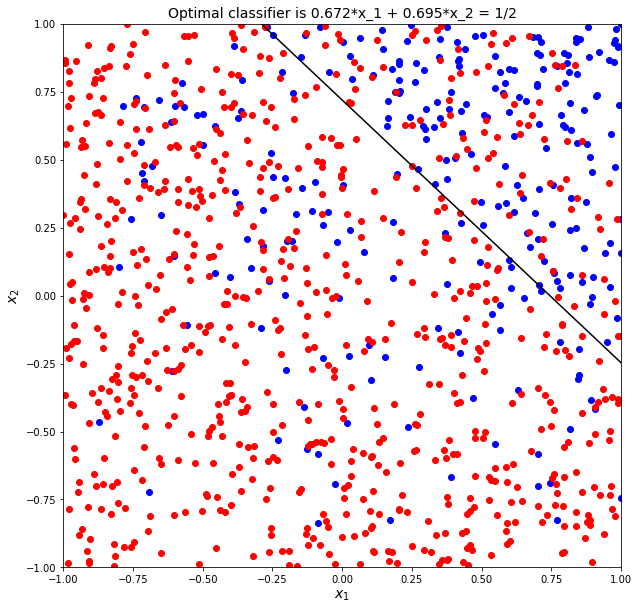

In [45]:
plt.figure(figsize=(10,10))
plt.plot(X[real==1][:,0],X[real==1][:,1],'bo' )
plt.plot(X[real==0][:,0],X[real==0][:,1],'ro' )
plt.plot([1,-1],[-0.247482,1.68633], color = 'black')

plt.xlabel(r'$x_1$',fontsize = 14)
plt.ylabel(r'$x_2$', fontsize =14)
plt.title('Optimal classifier is {x1_c:.3f}*x_1 + {x2_c:.3f}*x_2 = 1/2'.format(x1_c = trendpoly[0], x2_c = trendpoly[1]), fontsize = 14)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.savefig('figure_for_report')

###  How large should $l$ be such that the confidence level of the empirically optimal classifier being at most $10\%$ worse than the class-optimal classifier is 0.75

In [ ]:
# Part F

# Here we have to use the empirical risk, in real life we don't know the Bayes risk
# this was suggested in the hint

eps = 0.1*empirical_risk
delta = 0.25
#Formula from part 2.9 from the lecture
min_n = 2/(eps)**2 * np.log(2*n*(n-1)/delta)
print('The minimum number of data points is:', min_n)

The minimum number of data points is: 74907.86878739997
